# Portfolio Analysis of Energy sector

### Stocks under observation:

    - Phillips 66 (NYSE:PSX) 
    - Valero Energy (NYSE:VLO)
    - Enterprise Products Partners (NYSE:EPD)
    - Clearway Energy (NYSE:CWEN)
    - Vivint Solar (NYSE:VSLR)
    - SolarEdge Technologies (NASDAQ:SEDG)


In [7]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [8]:
energy = ['PSX', 'VLO', 'EPD', 'CWEN','VSLR', 'SEDG' ]
data = pd.DataFrame()
for i in range(len(energy)):
    
    df = wb.DataReader(energy[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = energy[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,CWEN,EPD,PSX,SEDG,VLO,VSLR
Date,,,,,,
2020-01-02,19.851858,26.956884,111.082214,101.809998,92.570259,7.57
2020-01-03,19.812254,27.215626,107.409180,102.379997,89.057396,7.79
2020-01-06,19.871662,27.503115,106.735954,99.629997,89.067123,7.70
2020-01-07,19.782551,27.522280,107.062668,101.790001,90.234833,7.76
2020-01-08,20.000378,27.445616,103.062912,104.160004,90.585144,7.93


Text(0, 0.5, 'price in $')

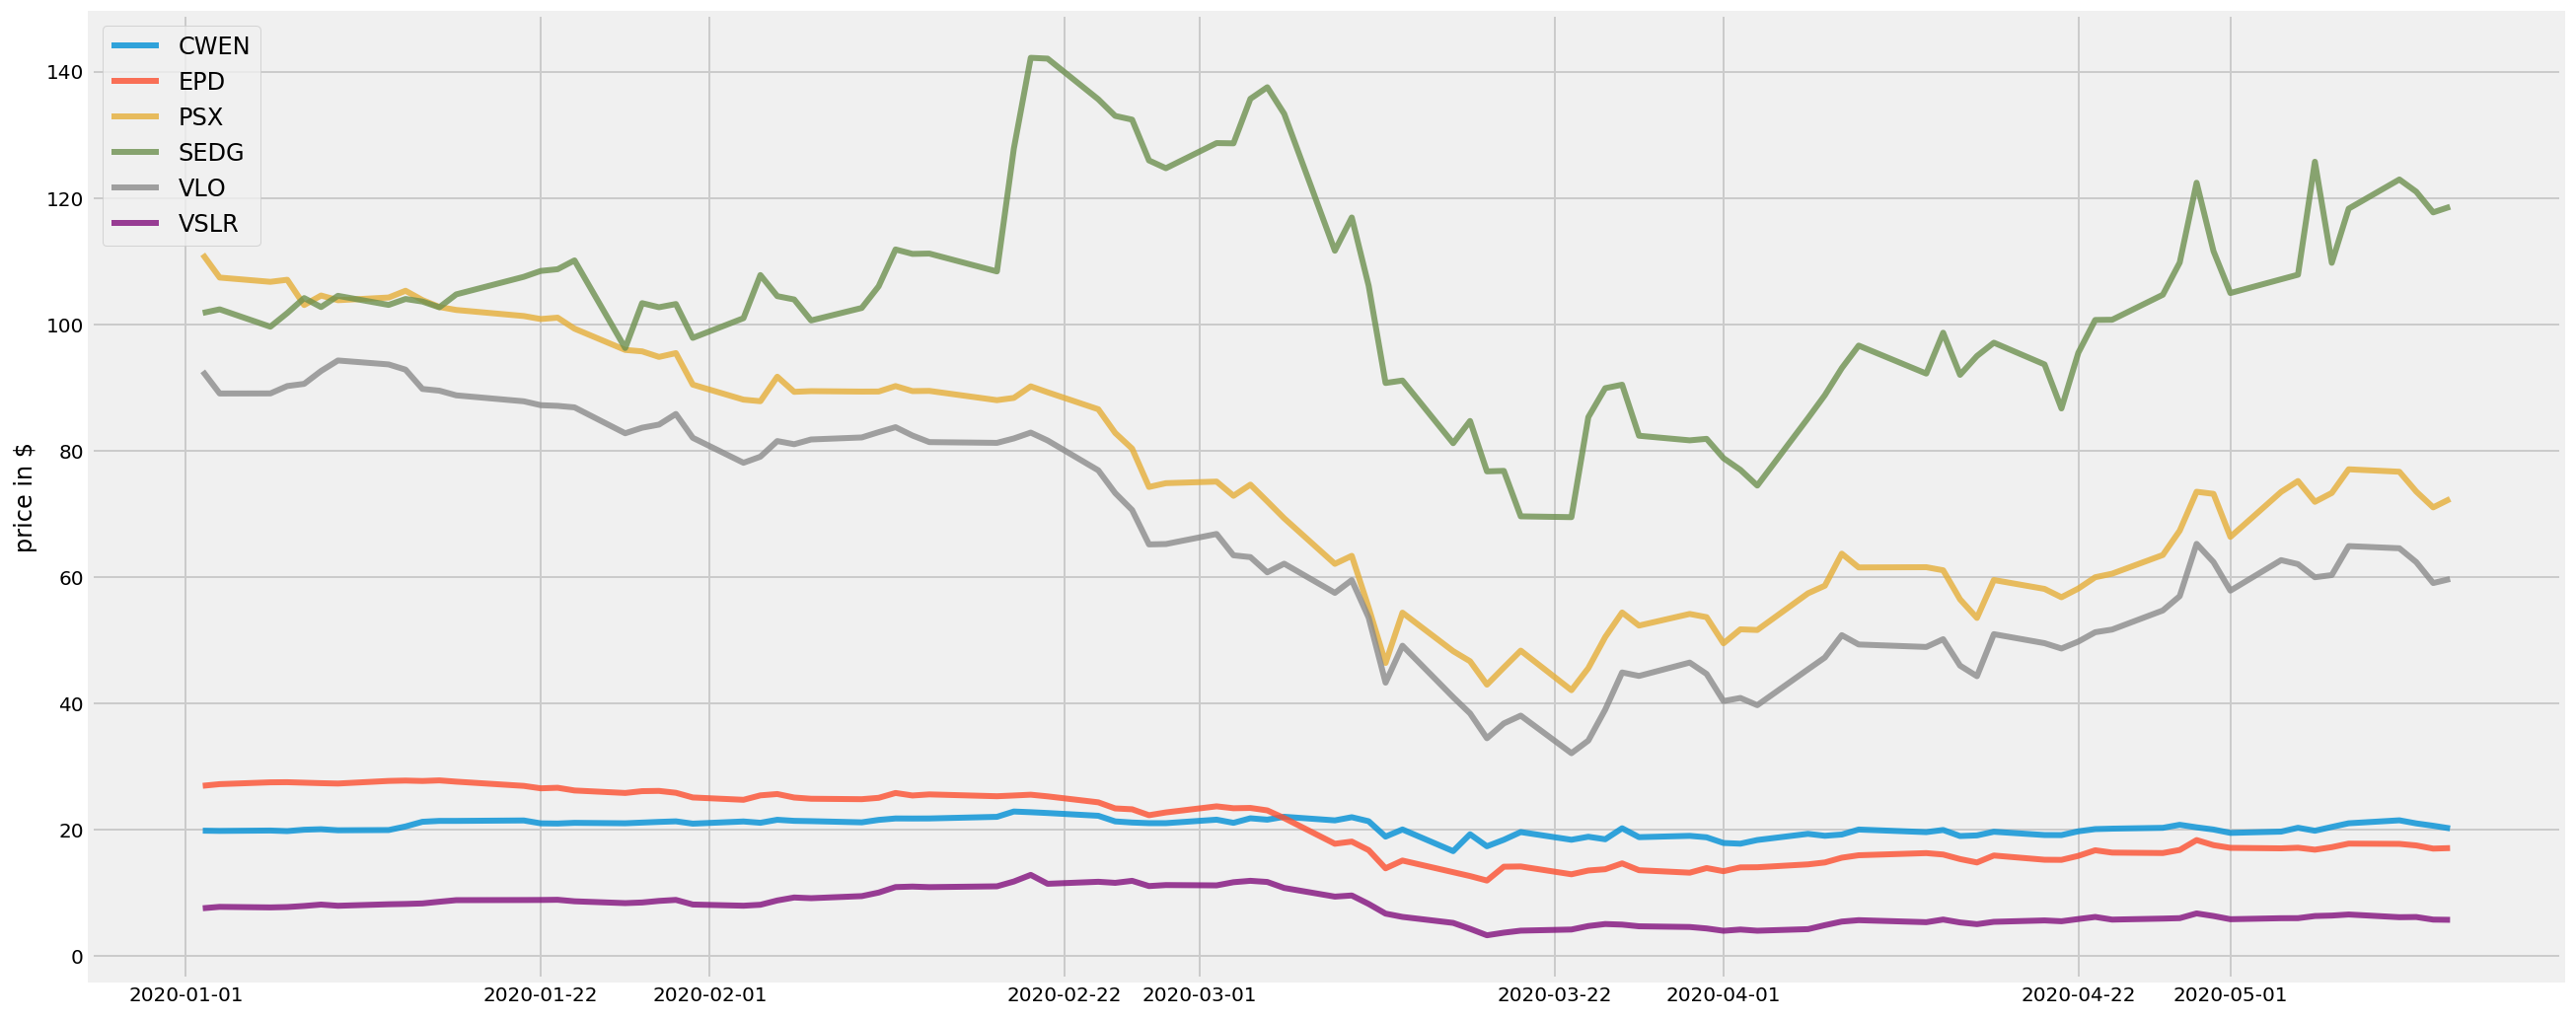

In [9]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

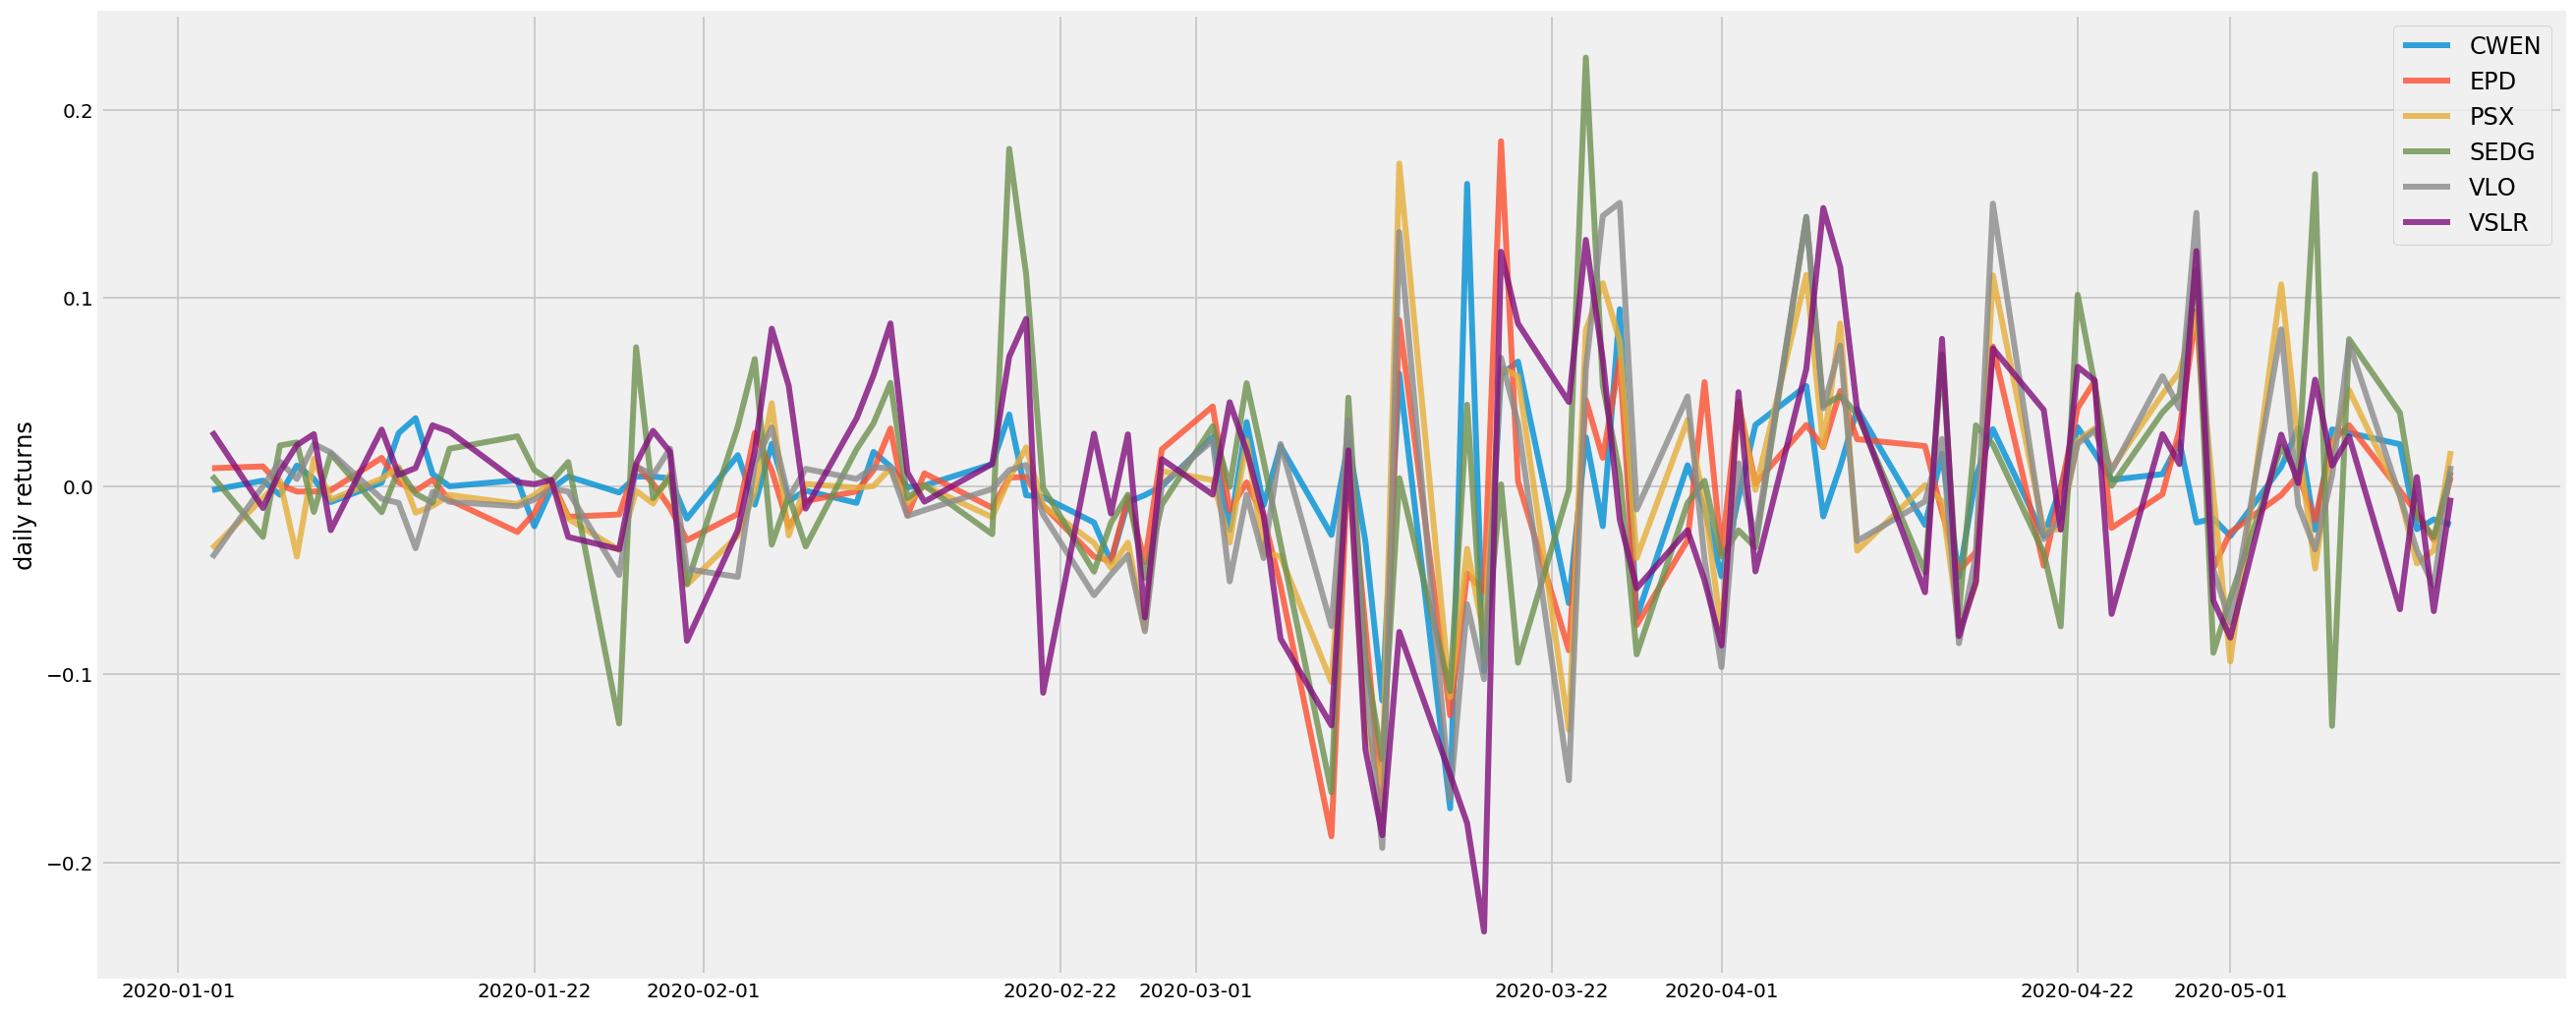

In [10]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

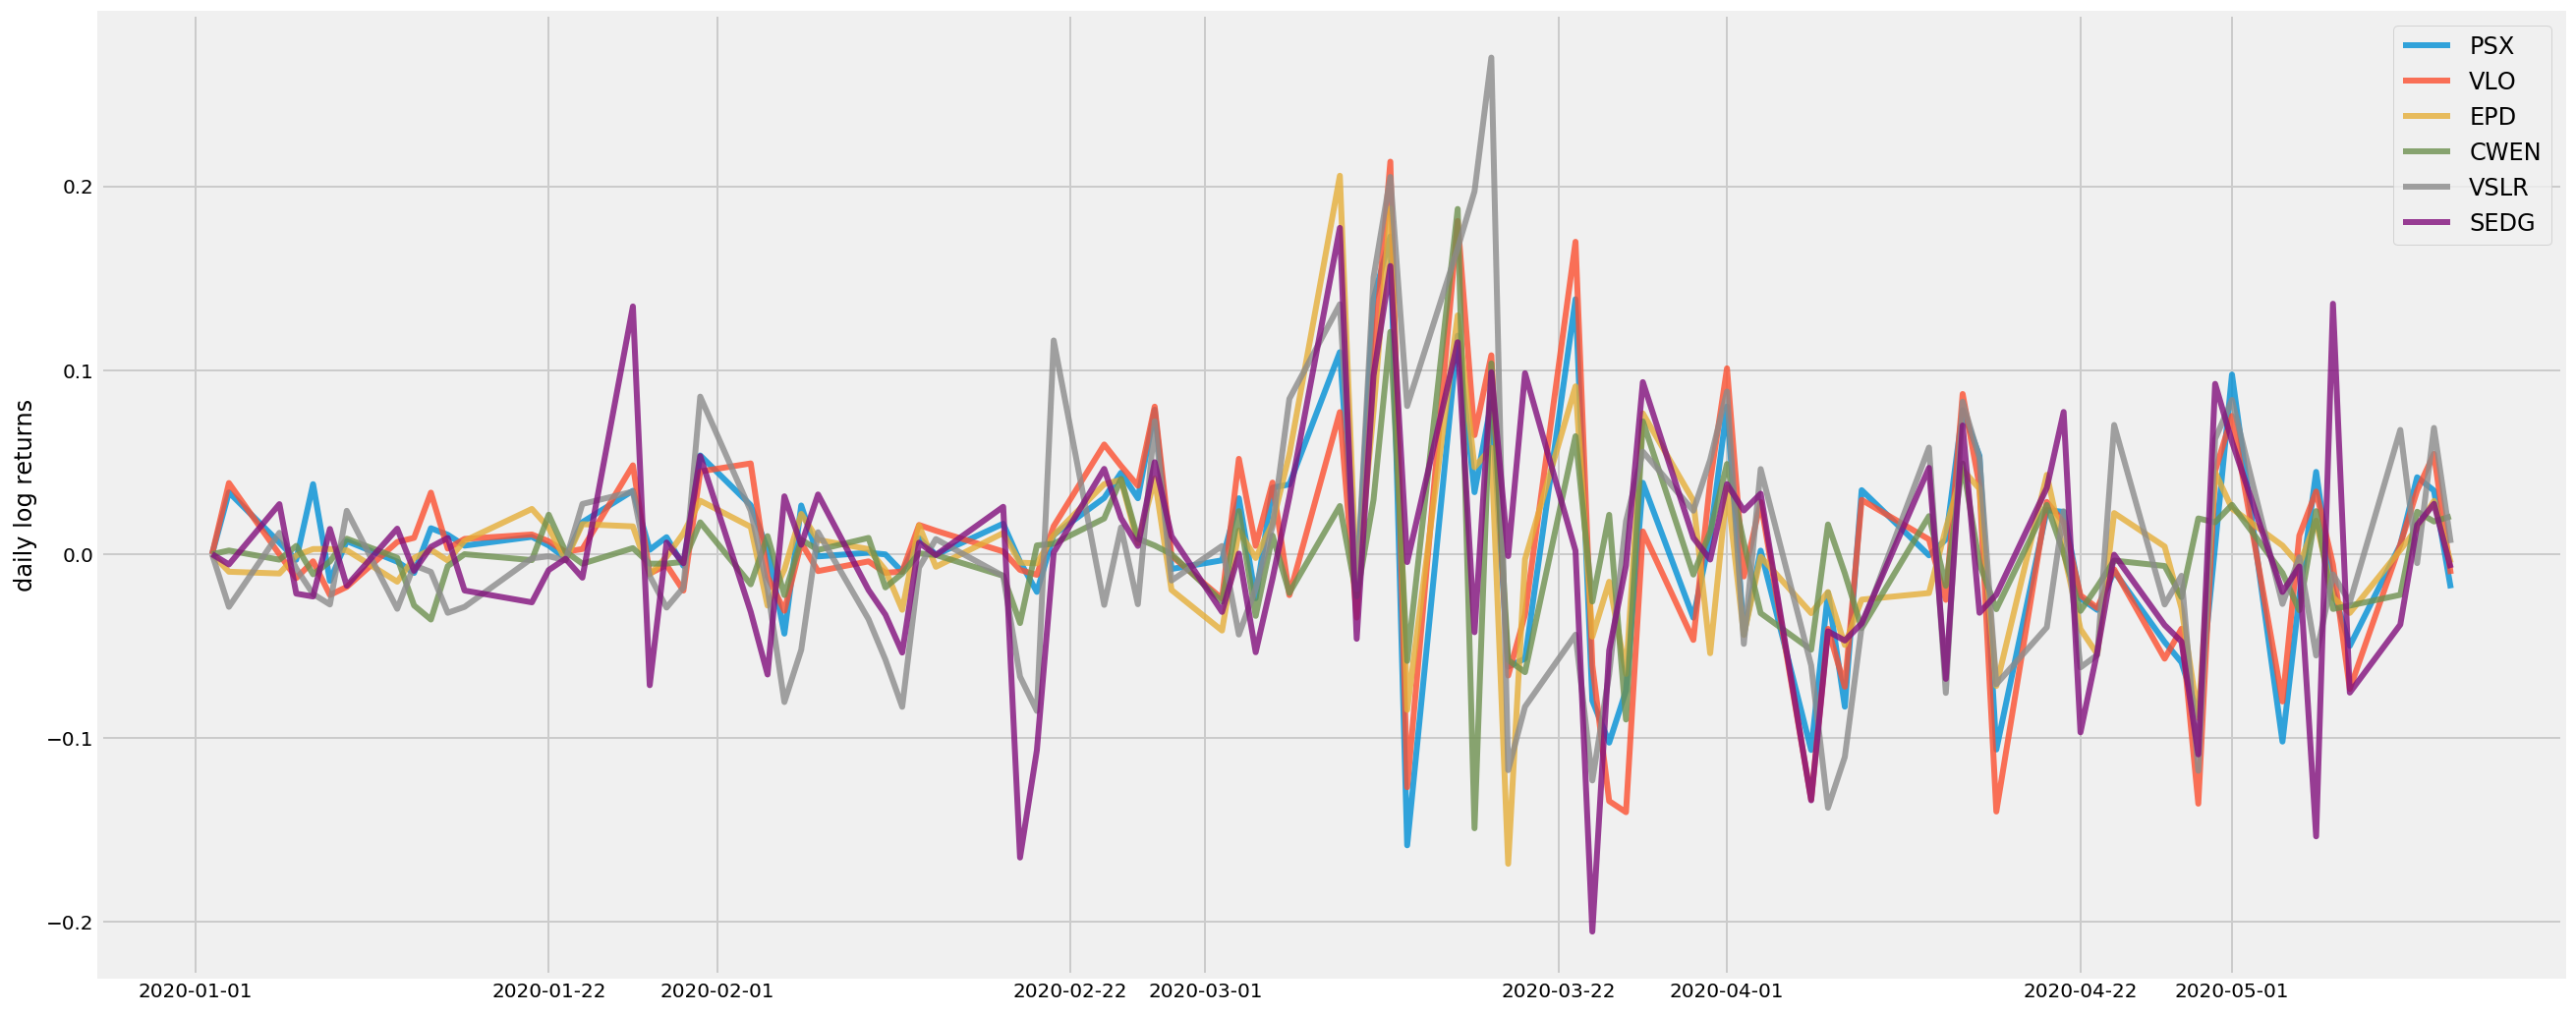

In [11]:
log = pd.DataFrame(columns = energy, index = table.index)

for i in range(len(energy)):
    log_list = []
    for j in range(len(table[energy[i]])):
        if(j+1<len(table[energy[i]])):
            log_returns =  np.log(table[energy[i]][j]) - np.log(table[energy[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[energy[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

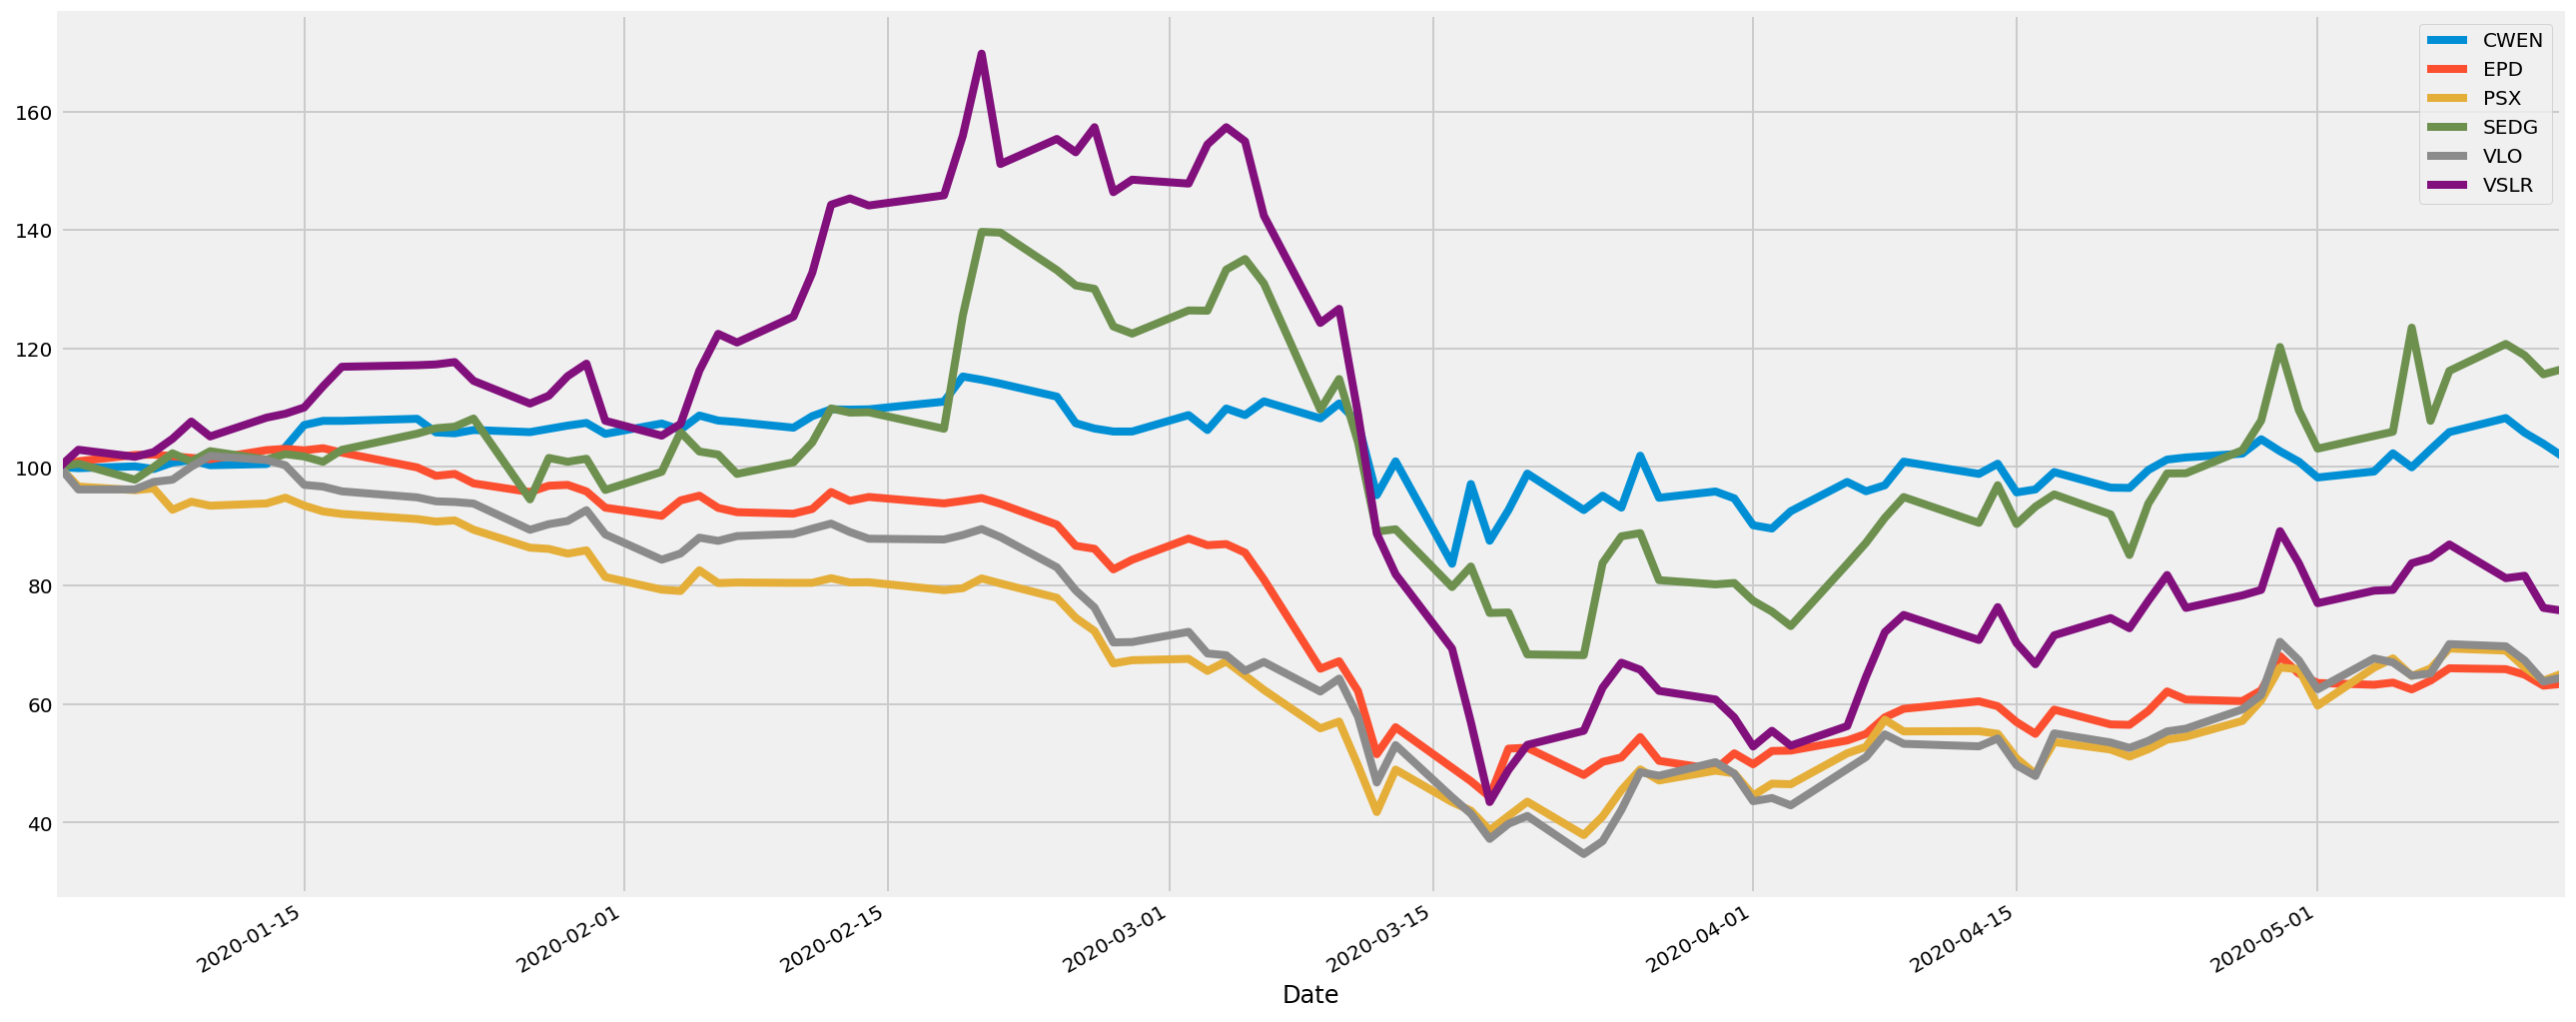

In [12]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [13]:
returns

,CWEN,EPD,PSX,SEDG,VLO,VSLR
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.001995,0.009598,-0.033066,0.005599,-0.037948,0.029062
2020-01-06,0.002999,0.010563,-0.006268,-0.026861,0.000109,-0.011553
2020-01-07,-0.004484,0.000697,0.003061,0.021680,0.013110,0.007792
2020-01-08,0.011011,-0.002786,-0.037359,0.023283,0.003882,0.021907
...,...,...,...,...,...,...
2020-05-08,0.028376,0.032483,0.051153,0.078185,0.076069,0.026521
2020-05-11,0.022360,-0.002247,-0.005061,0.039047,-0.005309,-0.065350
2020-05-12,-0.022801,-0.014077,-0.040955,-0.015780,-0.034009,0.004878


In [14]:
log.mean()*252

PSX     1.161414
VLO     1.189016
EPD     1.234669
CWEN   -0.048449
VSLR    0.752221
SEDG   -0.414084
dtype: float64

In [15]:
log.std()*252**0.5

PSX     0.872593
VLO     0.986743
EPD     0.774542
CWEN    0.634666
VSLR    1.150631
SEDG    1.026366
dtype: float64